In [1]:
# setup environment
import pathlib
import numpy as np
import matplotlib.pyplot as plt

# create higher resolution plots
%config InlineBackend.figure_format = 'retina'

# set directory
filesDir = pathlib.Path('./float32')

In [2]:
# load data
samples = {}
samples['theta']         = np.load(filesDir/'fhn_T200_samplePrior_theta.npy')
samples['spikeRate']     = np.load(filesDir/'fhn_T200_samplePrior_spikeRate.npy')
samples['spikeDuration'] = np.load(filesDir/'fhn_T200_samplePrior_spikeDuration.npy')
n_samples = samples['theta'].shape[0]

print('theta        ', samples['theta'].shape        , samples['theta'].dtype)
print('spikeRate    ', samples['spikeRate'].shape    , samples['spikeRate'].dtype)
print('spikeDuration', samples['spikeDuration'].shape, samples['spikeDuration'].dtype)
print('#samples', n_samples)

theta         (10000, 2) float32
spikeRate     (10000,) float32
spikeDuration (10000,) float32
#samples 10000


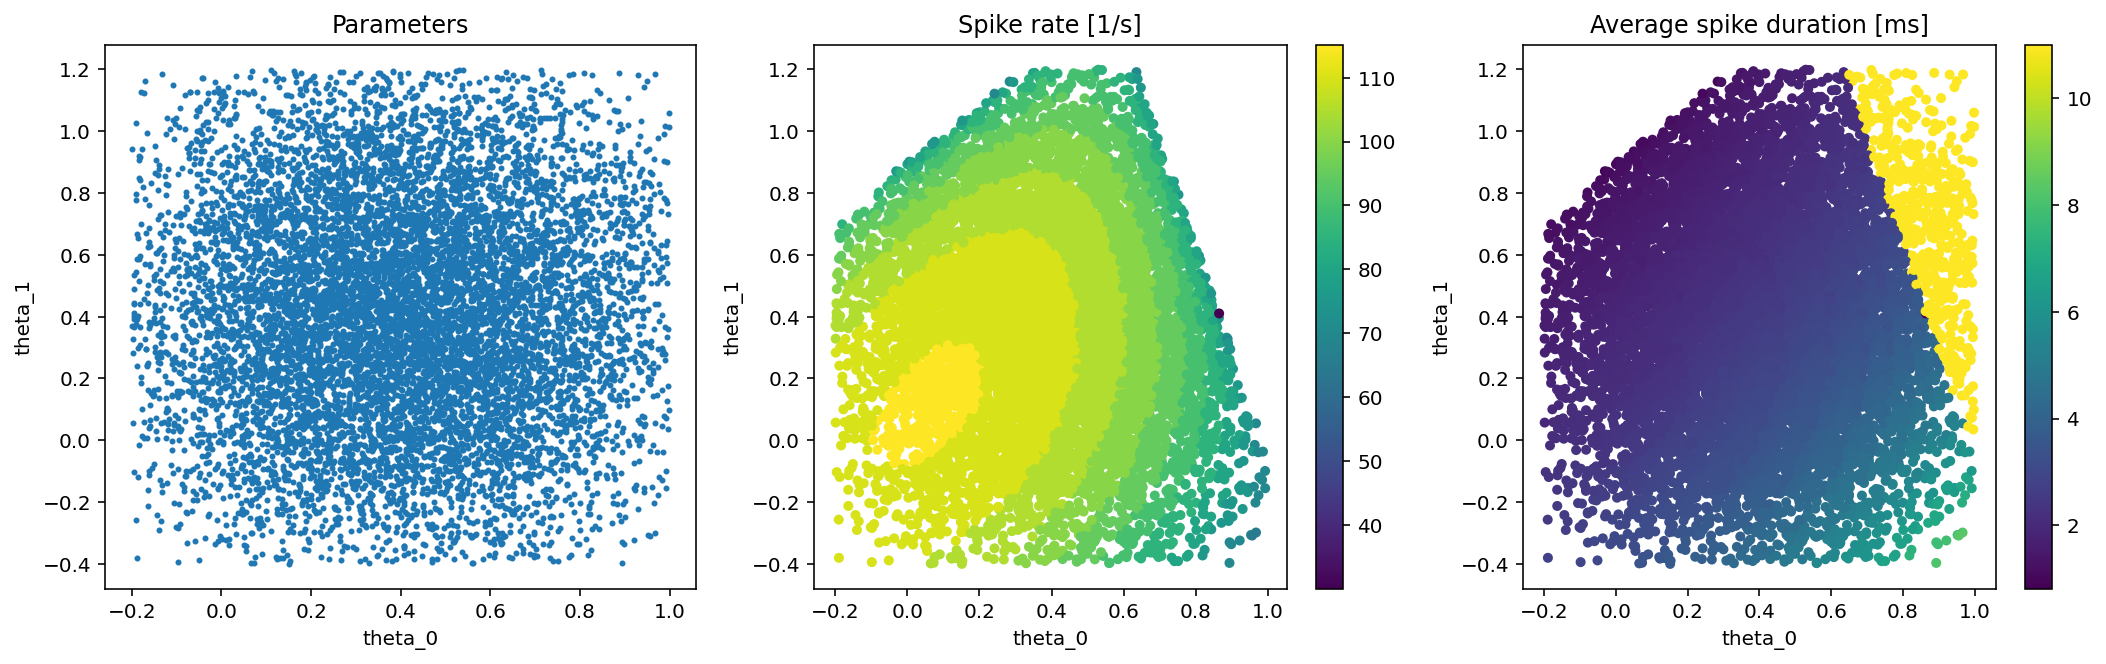

In [3]:
# get values for plotting
x, y = samples['theta'][:,0], samples['theta'][:,1]
spike_rate = samples['spikeRate']
spike_duration_clipped = np.clip(samples['spikeDuration'], 0.0, 11.0)
spike_duration_clipped[spike_duration_clipped < 1.0e-6] = np.nan

# create plots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].scatter(x, y, s=2**2)
ax[0].set_title('Parameters')
ax[0].set_xlabel('theta_0')
ax[0].set_ylabel('theta_1')

sc = ax[1].scatter(x, y, c=spike_rate, s=4**2, cmap='viridis')
ax[1].set_title('Spike rate [1/s]')
ax[1].set_xlabel('theta_0')
ax[1].set_ylabel('theta_1')
cb = fig.colorbar(sc, ax=ax[1])

sc = ax[2].scatter(x, y, c=spike_duration_clipped, s=4**2, cmap='viridis')
ax[2].set_title('Average spike duration [ms]')
ax[2].set_xlabel('theta_0')
ax[2].set_ylabel('theta_1')
cb = fig.colorbar(sc, ax=ax[2])

plt.show()